In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 15})

In [3]:
# This example was done for data that was published as 'RL / Gep^2' and 'RT / Gep^2', hence the calculation 
# for Gep^2 was needed to extract RL and RT for the paper 



In [38]:
# Input data 



# RL_STA = pd.read_csv(f'STA/STA_{int(q*1e3)}_longitudinal.csv',sep='\s+',header=None)
# RL_STA.columns = ['nu','RL']
# RT_STA = pd.read_csv(f'STA/STA_{int(q*1e3)}_transverse.csv',sep='\s+',header=None)
# RT_STA.columns = ['nu','RT']

q=0.3
# df = pd.read_csv('Python_Timchenko.csv')
# RL_Gep2 = df[['nu_RL', 'RL / Gep^2', 'Error_RL/Gep^2']]
# RT_Gep2 = df[['nu_RT', 'RT / Gep^2', 'Error_RT/Gep^2']]
RL_Gep2 = pd.read_csv(f'STA/STA_{int(q*1e3)}_longitudinal.csv',sep='\s+',header=None)
RL_Gep2.columns = ['nu_RL','RL / Gep^2']
# RL_Gep2['nu_RL']=RL_Gep2['nu_RL']*1e3
# RL_Gep2['Error_RL/Gep^2'] = 0.01 * RL_Gep2['RL / Gep^2']

RT_Gep2 = pd.read_csv(f'STA/STA_{int(q*1e3)}_transverse.csv',sep='\s+',header=None)
RT_Gep2.columns = ['nu_RT','RT / Gep^2']
# RT_Gep2['nu_RT']=RT_Gep2['nu_RT']*1e3
# RT_Gep2['Error_RT/Gep^2'] = 0.01 * RT_Gep2['RT / Gep^2']

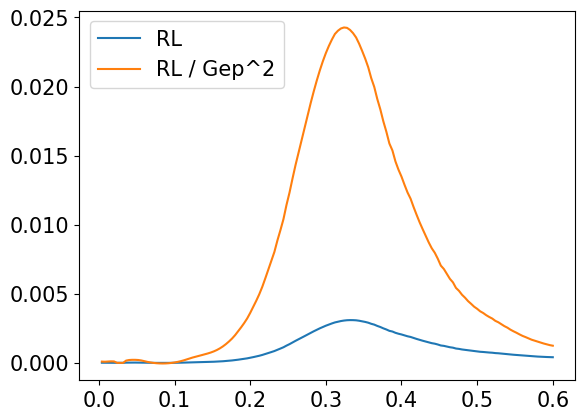

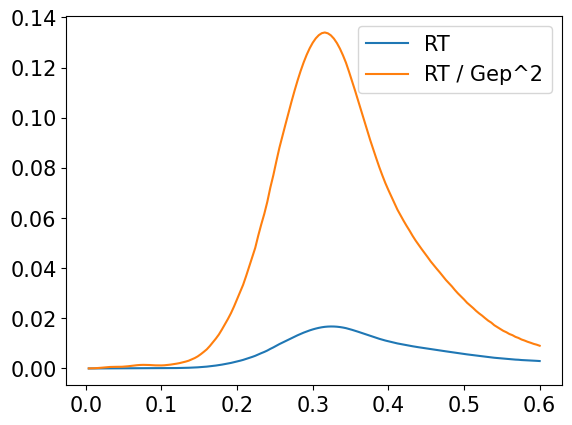

In [8]:
q=0.756

# RL
df = pd.read_csv(f'STA/STA_{int(q*1e3)}_longitudinal.csv',sep='\s+',header=None)
df.columns = ['nu','RL / Gep^2']
df['nu']=df['nu']*1e-3
df['Q2']=q**2-df['nu']**2
df=df.loc[df['Q2']>=0]
# print(df['Q2'])

M2_v = 0.71
M_p = 0.9383
df['GD']= 1 / ((1 + (df['Q2']/M2_v))**2)
df['tau_p'] = df['Q2']/(4.0*(M_p ** 2))
df['xi']=(2.0 / (1 + np.sqrt(1+(1/df['tau_p']))))

df['A_xi'] = -999.0
# Values for xi_j given along the lines in the paper as ξj = 0, 1/6, 1/3, 1/2, 2/3, 5/6, and 1.0.
xi_j = [0.0, 0.167, 0.333, 0.500, 0.667, 0.833, 1.0]
# Values for p_j were given by the A_Ep_dipole column in Table 2 from the A. Bodek, S. Avvakumov, R. Bradford & H. Budd paper
p_j = [1.0, 0.9839, 0.9632, 0.9748, 0.9136, 0.5447, -0.2682]
xi = df['xi'].values
A_xi = np.zeros(len(df['xi']))
for i in range(0, len(df['xi'])): 
    P_1 = p_j[0] * ( ((xi[i] - xi_j[1])/(xi_j[0] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[0] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[0] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[0] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[0] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[0] - xi_j[6]) ) ) 
    P_2 = p_j[1] * ( ((xi[i] - xi_j[0])/(xi_j[1] - xi_j[0])) * ((xi[i] - xi_j[2])/(xi_j[1] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[1] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[1] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[1] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[1] - xi_j[6]) ) ) 
    P_3 = p_j[2] * ( ((xi[i] - xi_j[0])/(xi_j[2] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[2] - xi_j[1])) * ((xi[i] - xi_j[3])/(xi_j[2] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[2] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[2] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[2] - xi_j[6]) ) ) 
    P_4 = p_j[3] * ( ((xi[i] - xi_j[0])/(xi_j[3] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[3] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[3] - xi_j[2])) * ((xi[i] - xi_j[4])/(xi_j[3] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[3] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[3] - xi_j[6])) )
    P_5 = p_j[4] * ( ((xi[i] - xi_j[0])/(xi_j[4] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[4] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[4] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[4] - xi_j[3])) * ((xi[i] - xi_j[5])/(xi_j[4] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[4] - xi_j[6])) )
    P_6 = p_j[5] * ( ((xi[i] - xi_j[0])/(xi_j[5] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[5] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[5] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[5] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[5] - xi_j[4])) * ((xi[i] - xi_j[6])/(xi_j[5] - xi_j[6]) ) )
    P_7 = p_j[6] * ( ((xi[i] - xi_j[0])/(xi_j[6] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[6] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[6] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[6] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[6] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[6] - xi_j[5]) ) )
    A_xi[i] = P_1 + P_2 + P_3 + P_4 + P_5 + P_6 + P_7
df['A_xi'] = A_xi

df['Gep']=df['A_xi']*df['GD']
df['Gep2']=df['Gep']**2

df['RL']=df['RL / Gep^2']*df['Gep2']

plt.figure()
plt.plot(df['nu'],df['RL'],label='RL')
plt.plot(df['nu'],df['RL / Gep^2'],label='RL / Gep^2')
plt.legend()
plt.show()
df.to_csv(f'STA/STA_{q}_RL.csv',index=False)



# now, RT

df = pd.read_csv(f'STA/STA_{int(q*1e3)}_transverse.csv',sep='\s+',header=None)
df.columns = ['nu','RT / Gep^2']
df['nu']=df['nu']*1e-3
df['Q2']=q**2-df['nu']**2
df=df.loc[df['Q2']>=0]
# print(df['Q2'])

M2_v = 0.71
M_p = 0.9383
df['GD']= 1 / ((1 + (df['Q2']/M2_v))**2)
df['tau_p'] = df['Q2']/(4.0*(M_p ** 2))
df['xi']=(2.0 / (1 + np.sqrt(1+(1/df['tau_p']))))

df['A_xi'] = -999.0
# Values for xi_j given along the lines in the paper as ξj = 0, 1/6, 1/3, 1/2, 2/3, 5/6, and 1.0.
xi_j = [0.0, 0.167, 0.333, 0.500, 0.667, 0.833, 1.0]
# Values for p_j were given by the A_Ep_dipole column in Table 2 from the A. Bodek, S. Avvakumov, R. Bradford & H. Budd paper
p_j = [1.0, 0.9839, 0.9632, 0.9748, 0.9136, 0.5447, -0.2682]
xi = df['xi'].values
A_xi = np.zeros(len(df['xi']))
for i in range(0, len(df['xi'])): 
    P_1 = p_j[0] * ( ((xi[i] - xi_j[1])/(xi_j[0] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[0] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[0] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[0] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[0] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[0] - xi_j[6]) ) ) 
    P_2 = p_j[1] * ( ((xi[i] - xi_j[0])/(xi_j[1] - xi_j[0])) * ((xi[i] - xi_j[2])/(xi_j[1] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[1] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[1] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[1] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[1] - xi_j[6]) ) ) 
    P_3 = p_j[2] * ( ((xi[i] - xi_j[0])/(xi_j[2] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[2] - xi_j[1])) * ((xi[i] - xi_j[3])/(xi_j[2] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[2] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[2] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[2] - xi_j[6]) ) ) 
    P_4 = p_j[3] * ( ((xi[i] - xi_j[0])/(xi_j[3] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[3] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[3] - xi_j[2])) * ((xi[i] - xi_j[4])/(xi_j[3] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[3] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[3] - xi_j[6])) )
    P_5 = p_j[4] * ( ((xi[i] - xi_j[0])/(xi_j[4] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[4] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[4] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[4] - xi_j[3])) * ((xi[i] - xi_j[5])/(xi_j[4] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[4] - xi_j[6])) )
    P_6 = p_j[5] * ( ((xi[i] - xi_j[0])/(xi_j[5] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[5] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[5] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[5] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[5] - xi_j[4])) * ((xi[i] - xi_j[6])/(xi_j[5] - xi_j[6]) ) )
    P_7 = p_j[6] * ( ((xi[i] - xi_j[0])/(xi_j[6] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[6] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[6] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[6] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[6] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[6] - xi_j[5]) ) )
    A_xi[i] = P_1 + P_2 + P_3 + P_4 + P_5 + P_6 + P_7
df['A_xi'] = A_xi

df['Gep']=df['A_xi']*df['GD']
df['Gep2']=df['Gep']**2

df['RT']=df['RT / Gep^2']*df['Gep2']

plt.figure()
plt.plot(df['nu'],df['RT'],label='RT')
plt.plot(df['nu'],df['RT / Gep^2'],label='RT / Gep^2')
plt.legend()
plt.show()
df.to_csv(f'STA/STA_{q}_RT.csv',index=False)

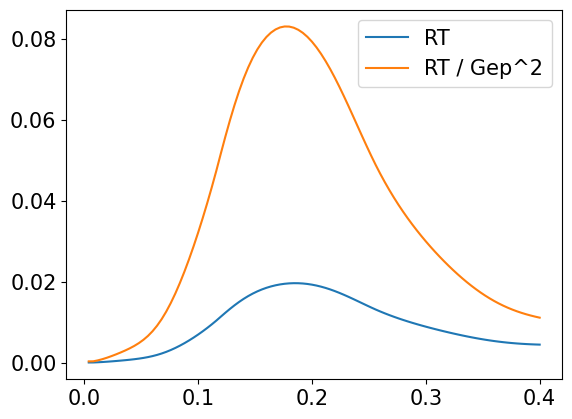

# Calculate Gep and Gep^2

In [40]:
# INSERT q CONSTANT VALUE FOR WHICH THE RESPONSE FUNCTION WAS EXTRACTED, in this example q = 300 MeV 
# q = 300.0/1000.0




# Calculate Q^2
nu = RL_Gep2['nu_RL'].values
Q2 =  np.nan*np.ones(len(nu))
for i in range(0, len(nu)): 
    Q2[i] = (q ** 2) - ((nu[i]/1000.0)**2)
print(Q2)


[ 0.089984  0.089936  0.089856  0.089744  0.0896    0.089424  0.089216
  0.088976  0.088704  0.0884    0.088064  0.087696  0.087296  0.086864
  0.0864    0.085904  0.085376  0.084816  0.084224  0.0836    0.082944
  0.082256  0.081536  0.080784  0.08      0.079184  0.078336  0.077456
  0.076544  0.0756    0.074624  0.073616  0.072576  0.071504  0.0704
  0.069264  0.068096  0.066896  0.065664  0.0644    0.063104  0.061776
  0.060416  0.059024  0.0576    0.056144  0.054656  0.053136  0.051584
  0.05      0.048384  0.046736  0.045056  0.043344  0.0416    0.039824
  0.038016  0.036176  0.034304  0.0324    0.030464  0.028496  0.026496
  0.024464  0.0224    0.020304  0.018176  0.016016  0.013824  0.0116
  0.009344  0.007056  0.004736  0.002384  0.       -0.002416 -0.004864
 -0.007344 -0.009856 -0.0124   -0.014976 -0.017584 -0.020224 -0.022896
 -0.0256   -0.028336 -0.031104 -0.033904 -0.036736 -0.0396   -0.042496
 -0.045424 -0.048384 -0.051376 -0.0544   -0.057456 -0.060544 -0.063664
 -0.066816

In [41]:
# Calculate GD(Q^2), tau, xi
GD =  np.nan*np.ones(len(nu))
tau_p =  np.nan*np.ones(len(nu))
xi =  np.nan*np.ones(len(nu))
M2_v = 0.71
M_p = 0.9383
for i in range(0, len(nu)):
    GD[i] = 1 / ((1 + (Q2[i]/M2_v))**2)
    tau_p[i] = Q2[i]/(4.0*(M_p ** 2))
    
for i in range(0, len(nu)):
    xi[i] = (2.0 / (1 + np.sqrt(1+(1/tau_p[i]))))

/var/folders/74/13k54tvs74vchflrfsmkcc_m0000gn/T/ipykernel_27179/1183468478.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  xi[i] = (2.0 / (1 + np.sqrt(1+(1/tau_p[i]))))
/var/folders/74/13k54tvs74vchflrfsmkcc_m0000gn/T/ipykernel_27179/1183468478.py:12: RuntimeWarning: invalid value encountered in sqrt
  xi[i] = (2.0 / (1 + np.sqrt(1+(1/tau_p[i]))))


In [9]:
# Inner product to get A_xi (apologies for it being done this way, I was rushing when I did this)

A_xi = np.nan*np.ones(len(xi))
# Values for xi_j given along the lines in the paper as ξj = 0, 1/6, 1/3, 1/2, 2/3, 5/6, and 1.0.
xi_j = [0.0, 0.167, 0.333, 0.500, 0.667, 0.833, 1.0]
# Values for p_j were given by the A_Ep_dipole column in Table 2 from the A. Bodek, S. Avvakumov, R. Bradford & H. Budd paper
p_j = [1.0, 0.9839, 0.9632, 0.9748, 0.9136, 0.5447, -0.2682]

# Inner product to produce A(xi)
for i in range(0, len(xi)):   
    P_1 = p_j[0] * ( ((xi[i] - xi_j[1])/(xi_j[0] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[0] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[0] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[0] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[0] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[0] - xi_j[6]) ) ) 
    P_2 = p_j[1] * ( ((xi[i] - xi_j[0])/(xi_j[1] - xi_j[0])) * ((xi[i] - xi_j[2])/(xi_j[1] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[1] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[1] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[1] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[1] - xi_j[6]) ) ) 
    P_3 = p_j[2] * ( ((xi[i] - xi_j[0])/(xi_j[2] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[2] - xi_j[1])) * ((xi[i] - xi_j[3])/(xi_j[2] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[2] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[2] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[2] - xi_j[6]) ) ) 
    P_4 = p_j[3] * ( ((xi[i] - xi_j[0])/(xi_j[3] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[3] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[3] - xi_j[2])) * ((xi[i] - xi_j[4])/(xi_j[3] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[3] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[3] - xi_j[6])) )
    P_5 = p_j[4] * ( ((xi[i] - xi_j[0])/(xi_j[4] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[4] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[4] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[4] - xi_j[3])) * ((xi[i] - xi_j[5])/(xi_j[4] - xi_j[5])) * ((xi[i] - xi_j[6])/(xi_j[4] - xi_j[6])) )
    P_6 = p_j[5] * ( ((xi[i] - xi_j[0])/(xi_j[5] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[5] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[5] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[5] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[5] - xi_j[4])) * ((xi[i] - xi_j[6])/(xi_j[5] - xi_j[6]) ) )
    P_7 = p_j[6] * ( ((xi[i] - xi_j[0])/(xi_j[6] - xi_j[0])) * ((xi[i] - xi_j[1])/(xi_j[6] - xi_j[1])) * ((xi[i] - xi_j[2])/(xi_j[6] - xi_j[2])) * ((xi[i] - xi_j[3])/(xi_j[6] - xi_j[3])) * ((xi[i] - xi_j[4])/(xi_j[6] - xi_j[4])) * ((xi[i] - xi_j[5])/(xi_j[6] - xi_j[5]) ) )
    A_xi[i] = P_1 + P_2 + P_3 + P_4 + P_5 + P_6 + P_7

In [10]:
A_xi

array([0.9671089 , 0.96711573, 0.96712714, 0.96714314, 0.96716378,
       0.96718909, 0.96721915, 0.96725401, 0.96729375, 0.96733846,
       0.96738825, 0.96744321, 0.96750349, 0.96756921, 0.96764052,
       0.96771757, 0.96780056, 0.96788965, 0.96798505, 0.96808697,
       0.96819565, 0.96831133, 0.96870303, 0.96884946, 0.96900437,
       0.9691681 , 0.96934102, 0.96952352, 0.96971602, 0.96991894,
       0.97013276, 0.97035795, 0.97059503, 0.97084454, 0.97110704,
       0.97138315, 0.97167347, 0.97197869, 0.97229951, 0.97263665,
       0.97299089, 0.97336306, 0.973754  , 0.97416462, 0.97459587,
       0.97504875, 0.9755243 , 0.97602362, 0.97654787, 0.97709826,
       0.97767605, 0.97828258, 0.97891922, 0.97958742, 0.98028869,
       0.98102459, 0.98179671, 0.98260672, 0.98345631, 0.98434716,
       0.98528096, 0.98625937, 0.98728391, 0.98835593, 0.9894765 ,
       0.99064617, 0.99186473, 0.99313069, 0.99444054, 0.99578722,
       0.99715734, 0.99852596, 1.        ,        nan,        

In [12]:
# Get Gep from A(xi) and GD calculated previously 
Gep = np.nan*np.ones(len(xi))
Gep2 = np.nan*np.ones(len(xi))
for i in range(0, len(xi)):
    Gep[i] = A_xi[i] * GD[i]
    Gep2[i] = Gep[i]**2

# Multiply data RL/Gep^2 by Gep^2 to get RL and error

In [15]:
RL_Gep2_data = RL_Gep2['RL / Gep^2'].values
Error_RL = RL_Gep2['Error_RL/Gep^2'].values
RL = np.nan*np.ones(len(xi))
RL_error = np.nan*np.ones(len(xi))
for i in range(0, len(xi)):
    RL[i] = RL_Gep2_data[i] * Gep2[i]
    RL_error[i] = Error_RL[i] * Gep2[i]
    
RL

array([-0.00014565,  0.00058376,  0.00242866,  0.00697546,  0.01027541,
        0.01407252,  0.01806453,  0.02188811,  0.02520347,  0.02777137,
        0.02949132,  0.03039266,  0.03059268,  0.03024517,  0.02949868,
        0.02847357,  0.02725635,  0.02590522,  0.02445991,  0.02295087,
        0.02140538,  0.01985034,  0.01538719,  0.01388861,  0.01270361,
        0.01162182,  0.01063388,  0.00973136,  0.00890666,  0.00815292,
        0.00746392,  0.00683403,  0.0062581 ,  0.00573148,  0.00524989,
        0.00480945,  0.00440659,  0.00403807,  0.00370092,  0.00339244,
        0.00311016,  0.00285183,  0.00261538,  0.00239895,  0.00220083,
        0.00201945,  0.00185339,  0.00170135,  0.00156215,  0.00143468,
        0.00131796,  0.00121106,  0.00111314,  0.00102342,  0.00094119,
        0.00086578,  0.00079658,  0.00073302,  0.0006746 ,  0.00062083,
        0.00057126,  0.00052552,  0.00048322,  0.00044407,  0.00040776,
        0.00037405,  0.00034275,  0.00031367,  0.00028668,  0.00

In [16]:
RL_error

array([-1.45646593e-06,  5.83759877e-06,  2.42866214e-05,  6.97546223e-05,
        1.02754094e-04,  1.40725213e-04,  1.80645251e-04,  2.18881137e-04,
        2.52034749e-04,  2.77713696e-04,  2.94913198e-04,  3.03926587e-04,
        3.05926809e-04,  3.02451689e-04,  2.94986819e-04,  2.84735716e-04,
        2.72563508e-04,  2.59052188e-04,  2.44599137e-04,  2.29508688e-04,
        2.14053789e-04,  1.98503433e-04,  1.53871883e-04,  1.38886133e-04,
        1.27036105e-04,  1.16218191e-04,  1.06338793e-04,  9.73136075e-05,
        8.90666302e-05,  8.15292179e-05,  7.46392295e-05,  6.83402698e-05,
        6.25810448e-05,  5.73148156e-05,  5.24989396e-05,  4.80944842e-05,
        4.40658919e-05,  4.03806897e-05,  3.70092268e-05,  3.39244386e-05,
        3.11016285e-05,  2.85182666e-05,  2.61538035e-05,  2.39894969e-05,
        2.20082509e-05,  2.01944657e-05,  1.85339000e-05,  1.70135417e-05,
        1.56214897e-05,  1.43468460e-05,  1.31796162e-05,  1.21106217e-05,
        1.11314199e-05,  

# Plotting, please modify accordingly to your style 

ValueError: 'yerr' must not contain negative values

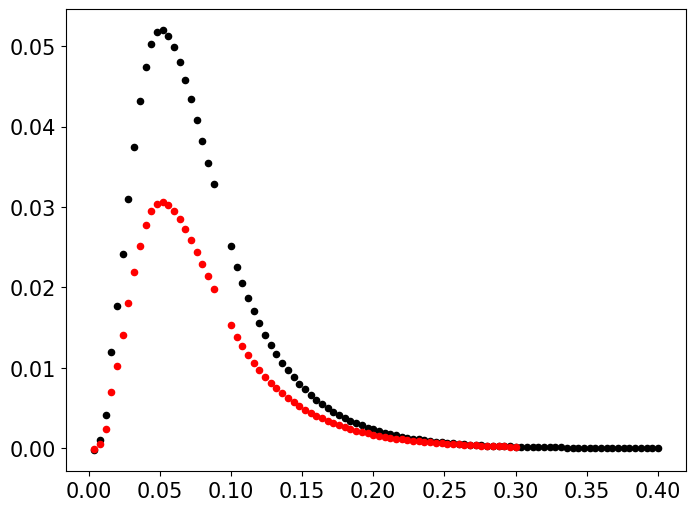

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(nu/1000, RL_Gep2_data, label='Digitized RL/Gep^2', s=20, color='k')

plt.scatter(nu/1000, RL, label='RL Extraction', s=20, color='r')
plt.errorbar(nu/1000, RL, yerr=RL_error, fmt = 'none', color='b', 
             elinewidth=1, capsize=2, barsabove=False, errorevery=1, capthick=None, data=None)

plt.title('Buki&Timchenko RL Data', fontsize = 15.0)
plt.xlabel(r'$\nu$ (GeV) ', fontsize = 15.0)
plt.ylabel('$R_L$', fontsize = 16.0)
plt.legend(loc='lower left', fontsize=14.0)

#plt.grid()
#plt.savefig('Parametrarized_Electric_ElasticFF_new.png')
plt.show()